<a href="https://colab.research.google.com/github/KodakV/train_datasets/blob/master/ClassificationForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import random
import pandas as  pd
random.seed(8)
np.random.seed(8)
torch.manual_seed(8)
torch.cuda.manual_seed(8)
torch.backends.cudnn.deteministic=True

In [ ]:
torch.cuda.is_available()

True

In [ ]:

df=pd.read_csv('/content/forest_dataset.csv')

In [ ]:
from sklearn.model_selection import train_test_split
df['54']=df['54'] -1
n_coloumn=53
X_train,X_test, y_train, y_test=train_test_split(df.iloc[:,:n_coloumn],df['54'],test_size=0.2,shuffle=True)
X_train=torch.FloatTensor(X_train.values)
X_test=torch.FloatTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)



SyntaxError: ignored

In [ ]:
class ForestNet(torch.nn.Module):
  def __init__(self,neurons, enter_x=53):
    super(ForestNet,self).__init__()
    self.fc1=torch.nn.Linear(enter_x,neurons)
    self.ac1=torch.nn.Sigmoid()
    self.fc2=torch.nn.Linear(neurons,neurons//2)
    self.ac2=torch.nn.ReLU()
    self.fc4=torch.nn.Linear(neurons//2,7)
    self.sm=torch.nn.Softmax(dim=1)

  def forward(self,x):
    x=self.fc1(x)
    x=self.ac1(x)
    x=self.fc2(x)
    x=self.ac2(x)
    x=self.fc4(x)

    return x
  
  def inference(self,x):
    x=self.forward(x)
    x=self.sm(x)
    return x


In [ ]:
forest_net=ForestNet(2500,n_coloumn)

loss=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(forest_net.parameters(),lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.90)


In [ ]:

device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
forest_net=forest_net.to(device)

In [ ]:
test_accuracy_history = []
test_loss_history = []

train_accuracy_history = []
train_loss_history = []


X_test = X_test.to(device)
y_test = y_test.to(device)
X_train=X_train.to(device)
y_train=y_train.to(device)

batch_size=2048
for epoch in range(600):
  order=np.random.permutation(len(X_train))
  scheduler.step()
  for start_index in range(0, len(X_train),batch_size):
    optimizer.zero_grad()
    batch_indexes=order[start_index:start_index+batch_size]
    x_batch=X_train[batch_indexes].to(device)
    y_batch=y_train[batch_indexes].to(device)
    preds=forest_net.forward(x_batch)

    loss_val=loss(preds,y_batch)
    loss_val.backward()

    optimizer.step()

   
  if (epoch % 10) == 0:
    test_preds = forest_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    train_preds = forest_net.forward(X_train)
    train_loss_history.append(loss(train_preds, y_train))
    
    accuracy_test = (test_preds.argmax(dim=1) == y_test).float().mean()
    accuracy_train = (train_preds.argmax(dim=1) == y_train).float().mean()
    test_accuracy_history.append(accuracy_test)
    train_accuracy_history.append(accuracy_train)
    print(accuracy_test)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


tensor(0.4820, device='cuda:0')
tensor(0.5210, device='cuda:0')
tensor(0.5600, device='cuda:0')
tensor(0.6280, device='cuda:0')
tensor(0.6670, device='cuda:0')
tensor(0.6835, device='cuda:0')
tensor(0.6960, device='cuda:0')
tensor(0.7155, device='cuda:0')
tensor(0.7130, device='cuda:0')
tensor(0.7205, device='cuda:0')
tensor(0.7210, device='cuda:0')
tensor(0.7325, device='cuda:0')
tensor(0.7340, device='cuda:0')
tensor(0.7215, device='cuda:0')
tensor(0.7425, device='cuda:0')
tensor(0.7355, device='cuda:0')
tensor(0.7415, device='cuda:0')
tensor(0.7390, device='cuda:0')
tensor(0.7280, device='cuda:0')
tensor(0.7415, device='cuda:0')
tensor(0.7395, device='cuda:0')
tensor(0.7505, device='cuda:0')
tensor(0.7515, device='cuda:0')
tensor(0.7300, device='cuda:0')
tensor(0.7525, device='cuda:0')
tensor(0.7495, device='cuda:0')
tensor(0.7505, device='cuda:0')
tensor(0.7475, device='cuda:0')
tensor(0.7460, device='cuda:0')
tensor(0.7470, device='cuda:0')
tensor(0.7560, device='cuda:0')
tensor(0

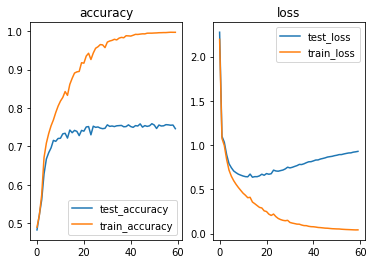

In [ ]:
import matplotlib.pyplot as plt
import pylab
pylab.subplot(1,2,1)
plt.plot(test_accuracy_history, label='test_accuracy')
plt.plot(train_accuracy_history, label='train_accuracy')
plt.title('accuracy')
plt.legend()
pylab.subplot(1,2,2)
plt.plot(test_loss_history, label='test_loss')
plt.plot(train_loss_history, label='train_loss')
plt.title('loss')
plt.legend()

In [ ]:
# from sklearn.metrics import classification_report  
# from sklearn.metrics import accuracy_score  
# from sklearn.neighbors import KNeighborsClassifier  
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# df=pd.read_csv('/content/forest_dataset.csv')
# X_train,X_test, y_train, y_test=train_test_split(df.iloc[:,:n_coloumn],df.iloc[:,54:55],test_size=0.2,shuffle=True)


# knc = KNeighborsClassifier(n_neighbors = 5)
# knc.fit(X_train,y_train)
# y_pred=knc.predict(X_test)
# # print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))


# # frt = RandomForestClassifier(n_estimators = 10)
# # frt.fit(X_train,y_train)
# # y_pred=frt.predict(X_test)
# # print(accuracy_score(y_test,y_pred))
# # print(classification_report(y_test,y_pred))

# # lr = LogisticRegression()
# # lr.fit(X_train,y_train)
# # y_pred=lr.predict(X_test)
# # print(accuracy_score(y_test,y_pred))
# # print(classification_report(y_test,y_pred))






              precision    recall  f1-score   support

           1       0.74      0.74      0.74       732
           2       0.76      0.84      0.80       977
           3       0.70      0.63      0.67       128
           4       0.33      0.67      0.44         3
           5       0.43      0.10      0.16        30
           6       0.69      0.39      0.50        70
           7       0.83      0.32      0.46        60

    accuracy                           0.75      2000
   macro avg       0.64      0.53      0.54      2000
weighted avg       0.74      0.75      0.74      2000



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':
